In this Data Project we will be looking at data from the 2012 election.

In this project we will analyze two datasets. The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

1.) Who was being polled and what was their party affiliation?<p>
2.) Did the poll results favor Romney or Obama?<p>
3.) How do undecided voters effect the poll?<p>
4.) Can we account for the undecided voters?<p>
5.) How did voter sentiment change over time?<p>
6.) Can we see an effect in the polls from the debates?<p>

We'll discuss the second data set later on!

Let's go ahead and start with our standard imports:

In [23]:
# for data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# for viz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

In [24]:
# grab some web data (http)
import requests

In [25]:
# this is used to work with the csv data
from StringIO import StringIO 

In [26]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Use Requests to get the info in text form
source = requests.get(url).text

# Use StringIO to avoid an IO error with pandas
poll_data = StringIO(source)

In [27]:
# now make a DataFrame
poll_df = pd.read_csv(poll_data)

In [28]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000,Likely Voters,Live Phone,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872,Likely Voters,Automated Phone,48,48,4,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041,Likely Voters,Internet,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


In [29]:
# get basic info
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 588
Data columns (total 14 columns):
Pollster                  589 non-null object
Start Date                589 non-null object
End Date                  589 non-null object
Entry Date/Time (ET)      589 non-null object
Number of Observations    567 non-null float64
Population                589 non-null object
Mode                      589 non-null object
Obama                     589 non-null int64
Romney                    589 non-null int64
Undecided                 422 non-null float64
Pollster URL              589 non-null object
Source URL                587 non-null object
Partisan                  589 non-null object
Affiliation               589 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 69.0+ KB


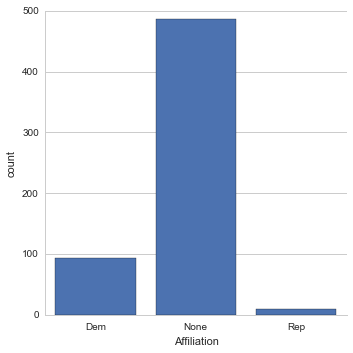

In [30]:
# visualization of the overview of polls
sns.factorplot('Affiliation',data=poll_df)

In [31]:
# so most of the polls didn't have an party affiliation

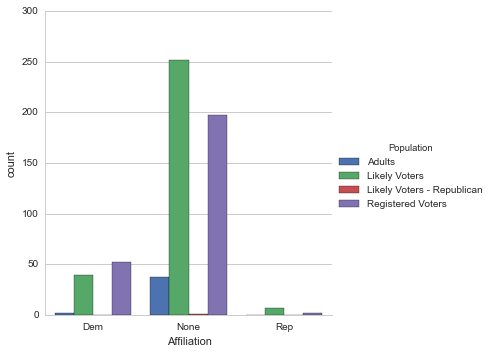

In [32]:
sns.factorplot('Affiliation',data=poll_df,hue='Population')

In [33]:
# look at averages
avg = pd.DataFrame(poll_df.mean())

avg.drop('Number of Observations',axis=0,inplace=True)

In [34]:
# have a quick look at the results
avg.head()

,0
Obama,46.772496
Romney,44.573854
Undecided,6.549763


In [35]:
# get standard deviation
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0,inplace=True)

In [36]:
std.head()

,0
Obama,2.448627
Romney,2.927711
Undecided,3.702235


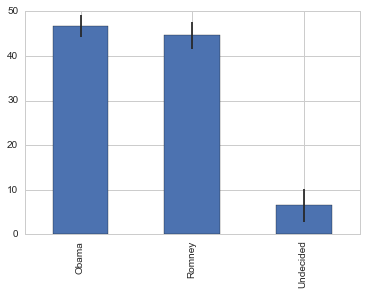

In [37]:
# plot with pandas
# average sentiment of all the polls
avg.plot(yerr=std,kind='bar',legend=False)

In [38]:
# look at undecided factor
poll_avg = pd.concat([avg,std],axis=1)

In [40]:
poll_avg.columns = ['Average','STD']

In [ ]:
# show

In [41]:
poll_avg

,Average,STD
Obama,46.772496,2.448627
Romney,44.573854,2.927711
Undecided,6.549763,3.702235


In [ ]:
# left off here end of lecture 67

In [42]:
# now look at DataFrame again
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000,Likely Voters,Live Phone,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872,Likely Voters,Automated Phone,48,48,4,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041,Likely Voters,Internet,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


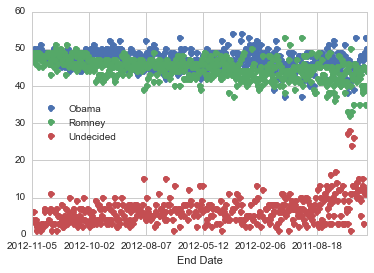

In [43]:
# time series favor undecided
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='o')

In [44]:
# sentiment vs. time, diff between Obama and Romney
from datetime import datetime

In [45]:
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100

poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000,Likely Voters,Live Phone,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,0.00
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None,0.01
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872,Likely Voters,Automated Phone,48,48,4,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,0.00
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041,Likely Voters,Internet,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep,0.00
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,-0.01


In [46]:
# visualize over time
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Difference
0,2009-03-13,1403,44,44,12,0.00
1,2009-04-17,686,50,39,11,0.11
2,2009-05-14,1000,53,35,12,0.18
3,2009-06-12,638,48,40,12,0.08
4,2009-07-15,577,49,40,11,0.09


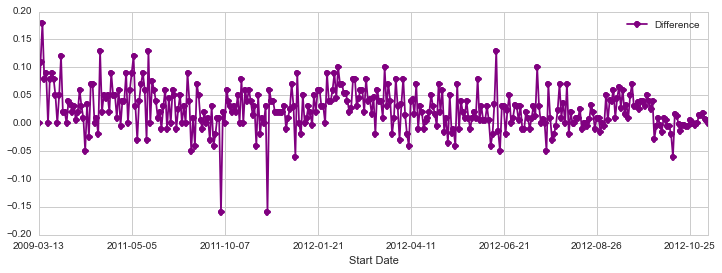

In [47]:
poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')

In [50]:
# look at the debates Oct 2012

row_in = 0
xlimit = []

# trying to find when the start date was Oct 2012
for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in +=1
    
print min(xlimit)
print max(xlimit)

329
356


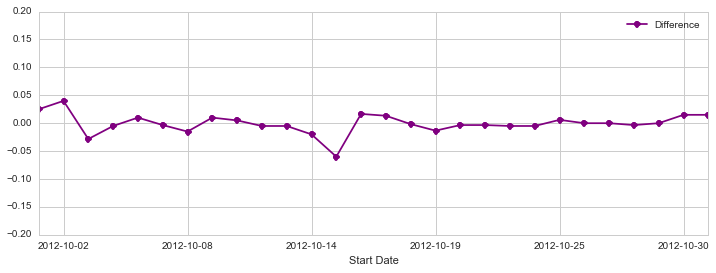

In [53]:
# plot again with xlimits
poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=[329,356])

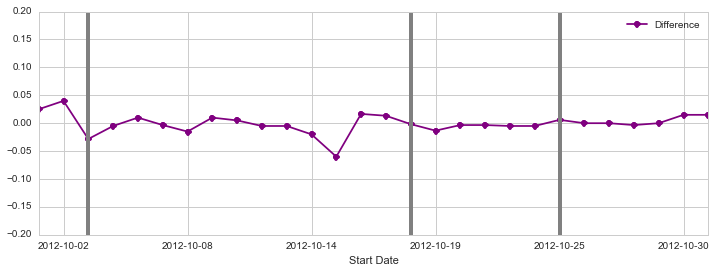

In [55]:
# now plot with markers for debate dates
poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=[329,356])

# debate dates
# Oct 3
plt.axvline(x=329+2,linewidth=4,color='grey')

# Oct 16
plt.axvline(x=329+15,linewidth=4,color='grey')

# Oct 22
plt.axvline(x=329+21,linewidth=4,color='grey')

In [ ]:
# left off here end of lecture 68